**Assignment 3 : Neural Networks**

210642G - Thennakoon T. M. K. R

Github Link : https://github.com/kisalthennakoon/Assignments/tree/main/Computer%20Vision/Assignment3

**1)**

Running the given Code

In [10]:
import torch
import torch . nn as nn
import torch . optim as optim
import torchvision
import torchvision . transforms as transforms
import matplotlib . pyplot as plt

100%|██████████| 170M/170M [00:02<00:00, 70.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1 / 20, Loss: 0.9769251806139946
Epoch 2 / 20, Loss: 0.9498352479338646
Epoch 3 / 20, Loss: 0.9361001766324043
Epoch 4 / 20, Loss: 0.9275451058745384
Epoch 5 / 20, Loss: 0.9216050246953964
Epoch 6 / 20, Loss: 0.9172011212706566
Epoch 7 / 20, Loss: 0.9137878697514534
Epoch 8 / 20, Loss: 0.9110599359869958
Epoch 9 / 20, Loss: 0.90883082228899
Epoch 10 / 20, Loss: 0.9069782203435898
Epoch 11 / 20, Loss: 0.9054174340367317
Epoch 12 / 20, Loss: 0.9040896922945977
Epoch 13 / 20, Loss: 0.9029509267807007
Epoch 14 / 20, Loss: 0.9019674565196037
Epoch 15 / 20, Loss: 0.9011134061813354
Epoch 16 / 20, Loss: 0.9003683339357376
Epoch 17 / 20, Loss: 0.8997155225276947
Epoch 18 / 20, Loss: 0.8991421748399735
Epoch 19 / 20, Loss: 0.8986366546154022
Epoch 20 / 20, Loss: 0.8981900747418403


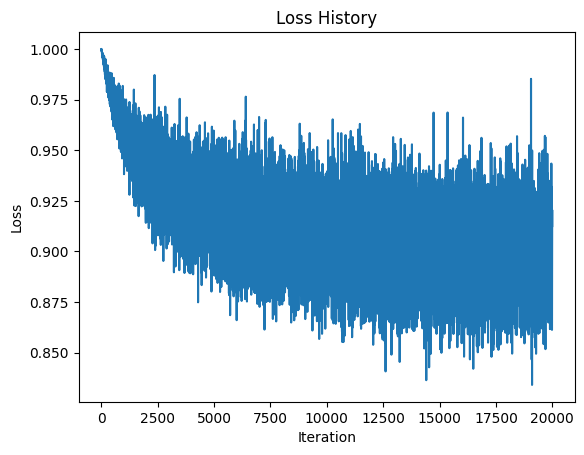

Training accuracy: 32.21%
Test accuracy: 32.46%


In [ ]:

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


**1) a), b), c)**

100%|██████████| 170M/170M [00:03<00:00, 49.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 2.3028928372859956
Epoch 2/10, Loss: 2.3028323171138765
Epoch 3/10, Loss: 2.302849119901657
Epoch 4/10, Loss: 2.302771100521088
Epoch 5/10, Loss: 2.302821184396744
Epoch 6/10, Loss: 2.302813170194626
Epoch 7/10, Loss: 2.302715996026993
Epoch 8/10, Loss: 2.302678884744644
Epoch 9/10, Loss: 2.3025550694465635
Epoch 10/10, Loss: 2.3022790336608887


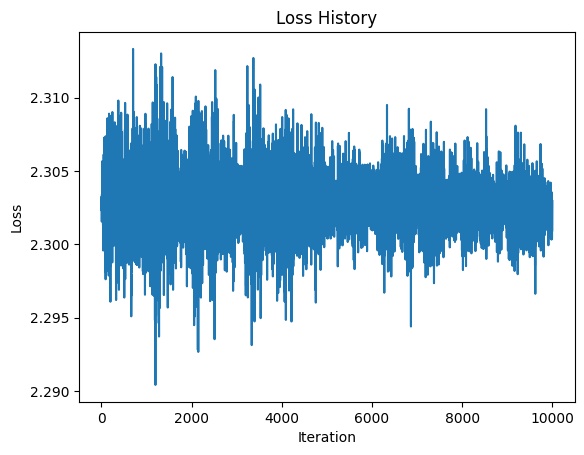

Training accuracy: 15.46%
Test accuracy: 15.69%


In [ ]:
# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)             # Biases for hidden layer
w2 = torch.randn(H, K) * std     # Weights for hidden to output layer
b2 = torch.zeros(K)              # Biases for output layer

# Hyperparameters
iterations = 10
lr = 2e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0.001  # Regularization strength
loss_history = []

# 3. Training Loop
for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        scores = hidden.mm(w2) + b2  # Output layer activation (scores)

        # Cross-entropy loss
        loss = nn.functional.cross_entropy(scores, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dscores = torch.softmax(scores, dim=1)
        dscores[range(Ntr), labels] -= 1
        dscores /= Ntr

        dw2 = hidden.t().mm(dscores) + reg * w2
        db2 = dscores.sum(dim=0)

        dhidden = dscores.mm(w2.t()) * hidden * (1 - hidden)
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    print(f"Epoch {epoch + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        scores = hidden.mm(w2) + b2
        predicted_train = torch.argmax(scores, dim=1)

        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        scores = hidden.mm(w2) + b2
        predicted_test = torch.argmax(scores, dim=1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


**2)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the LeNet-5 Architecture
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> Pool
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> Pool
        x = x.view(-1, 16 * 5 * 5)  # Flatten the tensor
        x = torch.relu(self.fc1(x))  # Fully Connected Layer 1
        x = torch.relu(self.fc2(x))  # Fully Connected Layer 2
        x = self.fc3(x)  # Output Layer (10 classes)

        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Initialize Model, Loss Function, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training Function
def train(model, trainloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    return running_loss / len(trainloader), train_accuracy

# Testing Function
def test(model, testloader, criterion, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    return test_loss / len(testloader), test_accuracy

# Train and Evaluate the Model for 10 Epochs
num_epochs = 10
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Epoch [1/10], Train Loss: 0.4327, Train Accuracy: 85.54%, Test Loss: 0.1448, Test Accuracy: 95.59%
Epoch [2/10], Train Loss: 0.0983, Train Accuracy: 96.96%, Test Loss: 0.0814, Test Accuracy: 97.45%
Epoch [3/10], Train Loss: 0.0654, Train Accuracy: 97.94%, Test Loss: 0.0616, Test Accuracy: 98.01%
Epoch [4/10], Train Loss: 0.0498, Train Accuracy: 98.45%, Test Loss: 0.0425, Test Accuracy: 98.65%
Epoch [5/10], Train Loss: 0.0405, Train Accuracy: 98.71%, Test Loss: 0.0433, Test Accuracy: 98.69%
Epoch [6/10], Train Loss: 0.0331, Train Accuracy: 98.92%, Test Loss: 0.0405, Test Accuracy: 98.57%
Epoch [7/10], Train Loss: 0.0287, Train Accuracy: 99.05%, Test Loss: 0.0377, Test Accuracy: 98.72%
Epoch [8/10], Train Loss: 0.0251, Train Accuracy: 99.19%, Test Loss: 0.0353, Test Accuracy: 98.87%
Epoch [9/10], Train Loss: 0.0208, Train Accuracy: 99.34%, Test Loss: 0.0349, Test Accuracy: 98.94%
Epoch [10/10], Train Loss: 0.0191, Train Accuracy: 99.39%, Test Loss: 0.0385, Test Accuracy: 98.79%


**3)**

In [11]:
!unzip -q archive.zip -d Dataset

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
import os


# 1. Data Preprocessing
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

# Load the Hymenoptera dataset (bees and ants)
data_dir = 'Dataset/hymenoptera'  # Path to the dataset directory
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# 2. Load Pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers (feature extraction mode)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer for 2 classes (bees and ants)
model.fc = nn.Linear(model.fc.in_features, 2)

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

**3. a)**

In [13]:
# 3. Fine-tuning the model
def fine_tune_model(model, dataloaders, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in dataloaders['train']:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloaders["train"]):.4f}, Training Accuracy: {train_accuracy:.2f}%')

# 5. Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Fine-tuning approach (train the entire model)
optimizer_finetune = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Feature extraction approach (train only the classifier layer)
optimizer_feature_extraction = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# 6. Run Fine-tuning
fine_tune_model(model, dataloaders, criterion, optimizer_finetune, num_epochs=10)




Epoch 1/10, Loss: 0.7718, Training Accuracy: 48.36%
Epoch 2/10, Loss: 0.5929, Training Accuracy: 69.26%
Epoch 3/10, Loss: 0.4352, Training Accuracy: 82.79%
Epoch 4/10, Loss: 0.3358, Training Accuracy: 88.52%
Epoch 5/10, Loss: 0.3117, Training Accuracy: 88.93%
Epoch 6/10, Loss: 0.2861, Training Accuracy: 88.52%
Epoch 7/10, Loss: 0.2552, Training Accuracy: 91.80%
Epoch 8/10, Loss: 0.2150, Training Accuracy: 92.21%
Epoch 9/10, Loss: 0.2304, Training Accuracy: 91.39%
Epoch 10/10, Loss: 0.2433, Training Accuracy: 89.75%


**3. b)**

In [14]:
#Feature Extraction Model
def feature_extraction_model(model, dataloaders, criterion, optimizer, num_epochs=10):
    model.eval()  # Set the model to evaluation mode (important!)
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in dataloaders['train']:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # Forward pass - calculate the model's outputs (features)
            # Note: We are now outside the 'with torch.no_grad():' block
            features = model(inputs)

            # Calculate the loss based on the features and labels
            loss = criterion(features, labels)

            # Backward pass - calculate gradients of the loss with respect to the model parameters
            loss.backward()

            # Update the model parameters using the optimizer
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(features, 1)  # Get the predicted class
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloaders["train"]):.4f}, Training Accuracy: {train_accuracy:.2f}%')



# 7. Run Feature Extraction
feature_extraction_model(model, dataloaders, criterion, optimizer_feature_extraction, num_epochs=10)


Epoch 1/10, Loss: 0.1818, Training Accuracy: 95.08%
Epoch 2/10, Loss: 0.1881, Training Accuracy: 95.49%
Epoch 3/10, Loss: 0.1875, Training Accuracy: 93.03%
Epoch 4/10, Loss: 0.1717, Training Accuracy: 95.08%
Epoch 5/10, Loss: 0.1675, Training Accuracy: 95.90%
Epoch 6/10, Loss: 0.1589, Training Accuracy: 94.67%
Epoch 7/10, Loss: 0.1718, Training Accuracy: 93.03%
Epoch 8/10, Loss: 0.1500, Training Accuracy: 95.90%
Epoch 9/10, Loss: 0.1563, Training Accuracy: 93.03%
Epoch 10/10, Loss: 0.1838, Training Accuracy: 92.21%
